In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd

In [46]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [48]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [49]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [50]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [51]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [53]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [54]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [55]:
#Checking out Measurement table
result = session.query(Measurement).limit(50)
for item in result:
    print(item.id, item.station, item.date, item.prcp, item.tobs)

1 USC00519397 2010-01-01 0.08 65.0
2 USC00519397 2010-01-02 0.0 63.0
3 USC00519397 2010-01-03 0.0 74.0
4 USC00519397 2010-01-04 0.0 76.0
5 USC00519397 2010-01-06 None 73.0
6 USC00519397 2010-01-07 0.06 70.0
7 USC00519397 2010-01-08 0.0 64.0
8 USC00519397 2010-01-09 0.0 68.0
9 USC00519397 2010-01-10 0.0 73.0
10 USC00519397 2010-01-11 0.01 64.0
11 USC00519397 2010-01-12 0.0 61.0
12 USC00519397 2010-01-14 0.0 66.0
13 USC00519397 2010-01-15 0.0 65.0
14 USC00519397 2010-01-16 0.0 68.0
15 USC00519397 2010-01-17 0.0 64.0
16 USC00519397 2010-01-18 0.0 72.0
17 USC00519397 2010-01-19 0.0 66.0
18 USC00519397 2010-01-20 0.0 66.0
19 USC00519397 2010-01-21 0.0 69.0
20 USC00519397 2010-01-22 0.0 67.0
21 USC00519397 2010-01-23 0.0 67.0
22 USC00519397 2010-01-24 0.01 71.0
23 USC00519397 2010-01-25 0.0 67.0
24 USC00519397 2010-01-26 0.04 76.0
25 USC00519397 2010-01-27 0.12 68.0
26 USC00519397 2010-01-28 0.0 72.0
27 USC00519397 2010-01-30 None 70.0
28 USC00519397 2010-01-31 0.03 67.0
29 USC00519397 2010-

In [56]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [57]:
#Checking out Station table
result = session.query(Station)
for item in result:
    print(item.id, item.station, item.name, item.latitude, item.longitude, item.elevation)

1 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
2 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
4 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
5 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
6 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
7 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
8 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
9 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4


In [21]:
# Earliest Date
# result = session.query(Measurement.date).order_by(Measurement.date).first()
# earliest_date = result[0]

('2010-01-01')

In [58]:
# Latest Date
result = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = result[0]
latest_date

'2017-08-23'

In [59]:
# Calculate the date 1 year ago from the last data point in the database
# date 12 months ago from the Latest Date
twelve_month_ago = dt.datetime.strftime((dt.datetime.strptime(latest_date,'%Y-%m-%d') - dt.timedelta(days=365)).date(),'%Y-%m-%d')
twelve_month_ago

'2016-08-23'

In [60]:
# Perform a query to retrieve the the last 12 months of precipitation scores
prcp_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_month_ago).order_by(Measurement.date).all()

In [61]:
# Save the query results as a Pandas DataFrame 
df = pd.DataFrame(prcp_result, columns=['date','precipitation'])

# set the index to the date column
df = df.set_index('date')

# Sort the dataframe by date
df.sort_values('date')

df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


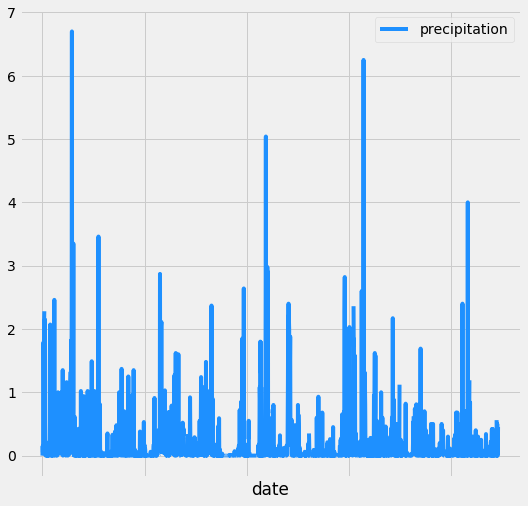

In [62]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(8,8), color='dodgerblue')

# plt.ylabel('precipitation')
plt.xlabel('date')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.savefig('precipitation_12_month.png', bbox_inches = "tight")
plt.show()

![precipitation](Images/precipitation.png)

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f'The summary statistics for the precipitation data {twelve_month_ago} to {latest_date}')
df.describe()

The summary statistics for the precipitation data 2016-08-23 to 2017-08-23


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [64]:
# Design a query to show how many stations are available in this dataset?
result = session.query(func.count(Station.station)).distinct()
num_station = result[0]
print(f"There are {num_station[0]} stations availabe in this dataset.")

There are 9 stations availabe in this dataset.


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
result = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
result

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
most_active_station = result[0][0]
most_active_station

'USC00519281'

In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [68]:
result = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == most_active_station).all()

print(f"The most active station: {most_active_station}\n\
with the following statistics, \n\
    The lowest temperature: {result[0][0]} °F\n\
    The highest temperature: {result[0][1]} °F\n\
    The average temperature: {round(result[0][2],1)} °F\n")

The most active station: USC00519281
with the following statistics, 
    The lowest temperature: 54.0 °F
    The highest temperature: 85.0 °F
    The average temperature: 71.7 °F



In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [69]:
tobs_result = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date >= twelve_month_ago).\
            filter(Measurement.station == most_active_station).\
            order_by(Measurement.tobs).all()
tobs_result
df = pd.DataFrame(tobs_result, columns=['date','tobs'])
df

,date,tobs
0,2017-02-02,59.0
1,2017-02-08,59.0
2,2017-02-09,59.0
3,2017-02-03,60.0
4,2017-04-30,60.0
5,2017-02-25,61.0
6,2016-12-15,62.0
7,2017-01-06,62.0
8,2017-01-09,62.0
9,2017-01-10,62.0


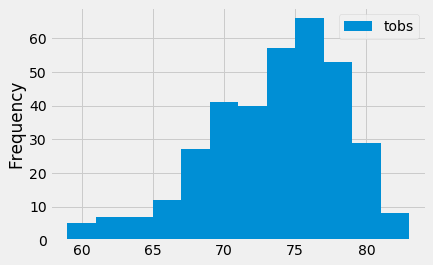

In [70]:
df.plot.hist(bins=12)
plt.savefig('temp_12_month_most_active.png', bbox_inches = "tight")
plt.show()

In [71]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [72]:
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
# mytrip_start_date = '2018-07-01'
# mytrip_end_date= '2018-07-11'

start_date = dt.datetime.strftime((dt.datetime.strptime('2018-07-01','%Y-%m-%d') - dt.timedelta(days=365)).date(),'%Y-%m-%d')
end_date = dt.datetime.strftime((dt.datetime.strptime('2018-07-11','%Y-%m-%d') - dt.timedelta(days=365)).date(),'%Y-%m-%d')
print(start_date)
print(end_date)

2017-07-01
2017-07-11


In [73]:
trip_temp = calc_temps(start_date, end_date)
print(trip_temp)

[(69.0, 78.03030303030303, 87.0)]


In [74]:
tmin = trip_temp[0][0]
tavg = trip_temp[0][1]
tmax = trip_temp[0][2]
trange = tmax-tmin

print(f"Based on temperature data from {start_date} to {end_date}\n\
with the following statistics, \n\
    The lowest temperature: {tmin} °F\n\
    The average temperature: {round(tavg,1)} °F\n\
    The highest temperature: {tmax} °F\n")

Based on temperature data from 2017-07-01 to 2017-07-11
with the following statistics, 
    The lowest temperature: 69.0 °F
    The average temperature: 78.0 °F
    The highest temperature: 87.0 °F



<IPython.core.display.Javascript object>


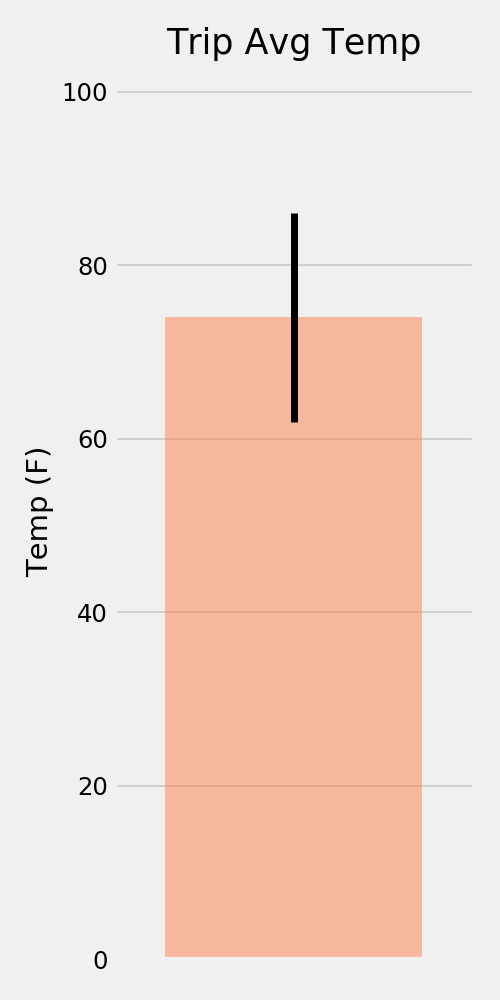

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


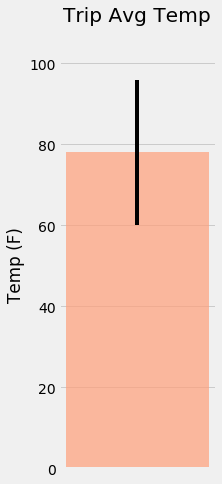

In [76]:
plt.figure(figsize=(2.5,7)) 
plt.bar(x='', height=tavg, yerr=trange, color='lightsalmon', alpha = 0.7)
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp', y=1.08)

ax = plt.axes() 
ax.xaxis.grid(False)

plt.savefig('trip_temp.png')
plt.show()

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [77]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [78]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_trip = '2018-01-01'
end_trip = '2018-01-07'
# Use the start and end date to create a range of dates
len_trip = (dt.datetime.strptime(end_trip,'%Y-%m-%d') - dt.datetime.strptime(start_trip,'%Y-%m-%d')).days + 1

# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
my_date = []
my_trip = []

for i in range(0, len_trip):
    date_trip = dt.datetime.strptime(start_trip,'%Y-%m-%d') + dt.timedelta(days=i)
    my_date.append(dt.datetime.strftime(date_trip,'%Y-%m-%d'))
    my_trip.append(daily_normals(dt.datetime.strftime(date_trip,'%m-%d'))[0])


In [79]:
my_date

['2018-01-01',
 '2018-01-02',
 '2018-01-03',
 '2018-01-04',
 '2018-01-05',
 '2018-01-06',
 '2018-01-07']

In [80]:
my_trip

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


In [81]:
df_trip = pd.DataFrame(my_trip, columns=['tmin','tavg','tmax'])
df_trip['date'] = my_date
df_trip = df_trip.set_index('date')
df_trip

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0


In [82]:
df_trip.index

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07'],
      dtype='object', name='date')

<IPython.core.display.Javascript object>


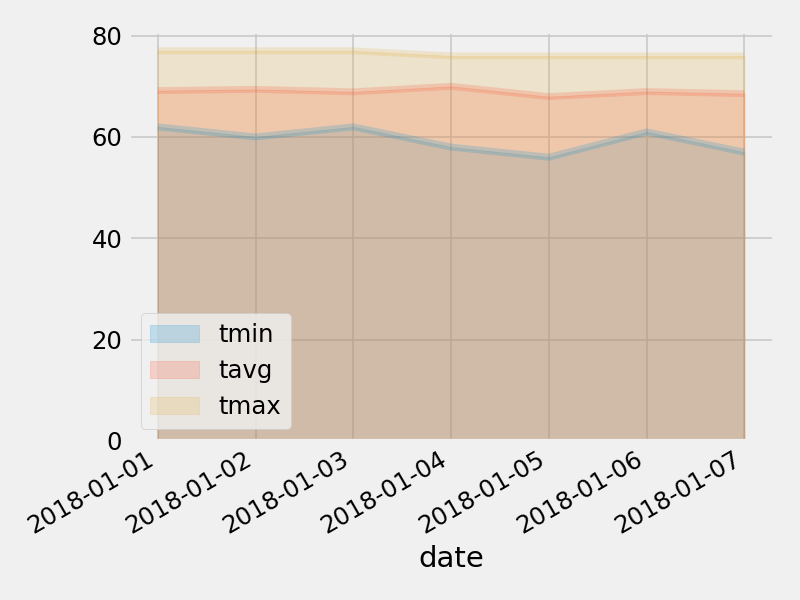

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


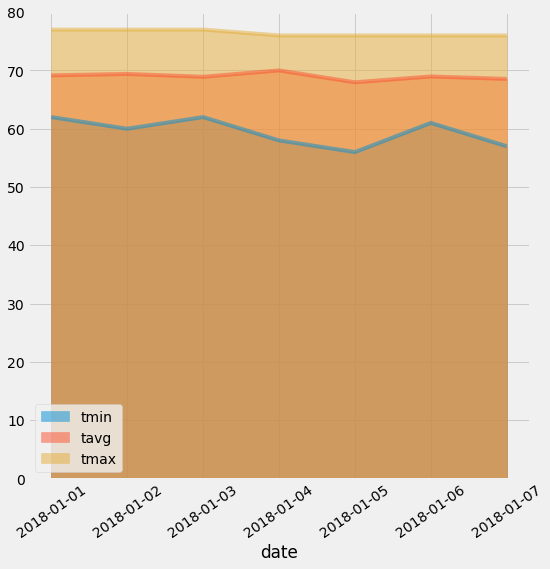

In [83]:
ax = df_trip.plot(kind='area',stacked=False,figsize=(8,8),ylim=(0,80))

ax.set_xticks(range(len(df_trip)))
ax.set_xticklabels(df_trip.index, rotation=35)
plt.xlabel('date')

# plt.ylabel('temperature')


plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.legend(loc='best')